# Validation

In [1]:
# general
import os
import numpy as np

# custom code
from zebrafish.configs import load_config
from zebrafish.dataset import register_datasets, load_all_image_in_dataset
from zebrafish.evaluation import coco_evaluation, coco_evaluation_all_model
from zebrafish.model import predict
from zebrafish.visualization import plot_prediction, plot_train_vs_validation_loss, plot_segementation, plot_segementation_vs_real, plot_all_model_validation_loss
from zebrafish.utils import is_in_main_dir

#detectron
from detectron2.utils.logger import setup_logger


setup_logger()

if "notebooks" in os.getcwd() and "colab" in os.getcwd():
    os.chdir("..")
    os.chdir("..")
    
assert is_in_main_dir(), "The notebook expectes you to be in the main directory"

register_datasets("dataset")


Bad key "text.kerning_factor" on line 4 in
/home/jordi/miniconda3/envs/detectron2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Restore model

In [8]:
model_name = "mask_rcnn_R_50_FPN_3x_WD_BS1_FA0_WUI0_RIOBS_512_DA_RF1_FL_RO_TAUG_train_direction"
threshold = 0.75
n_images = 1
path_to_model = "output/" + model_name


cfg = load_config(path_to_model)

## Evaluate model

In [9]:
coco_evaluation(cfg, "test")

[06/11 23:10:39 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/11 23:10:39 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/mask_rcnn_R_50_FPN_3x_WD_BS1_FA0_WUI0_RIOBS_512_DA_RF1_FL_RO_TAUG_train_direction/coco_instances_results.json
[06/11 23:10:39 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.437
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.789
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.488
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets

OrderedDict([('bbox',
              {'AP': 43.6619920746527,
               'AP50': 78.86184467620744,
               'AP75': 48.8494288956244,
               'APs': nan,
               'APm': 42.32673267326732,
               'APl': 48.88360121272369,
               'AP-Deformed': 44.07920792079208,
               'AP-Healthy': 43.2447762285133}),
             ('segm',
              {'AP': 40.73350852445925,
               'AP50': 70.36628427825156,
               'AP75': 42.73338888941119,
               'APs': nan,
               'APm': 38.950495049504944,
               'APl': 37.98245605987468,
               'AP-Deformed': 50.62706270627063,
               'AP-Healthy': 30.83995434264789})])

## Make predictions

In [10]:
dataset = "test"

images = load_all_image_in_dataset(dataset, cfg)[:]
predictions = predict(cfg, images, threshold=threshold)

## Plot predictions

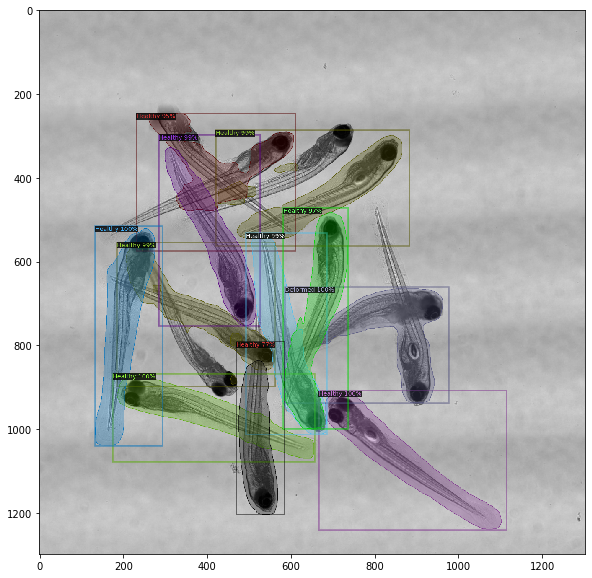

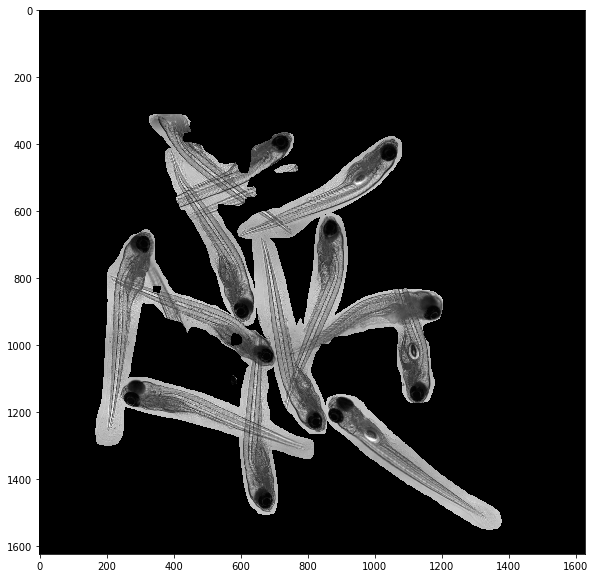

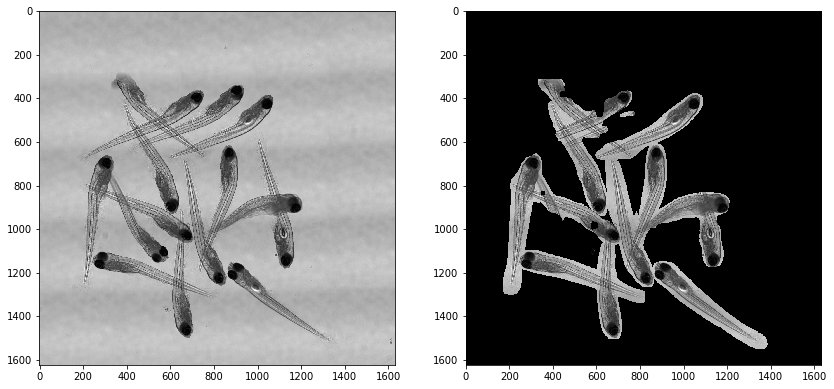

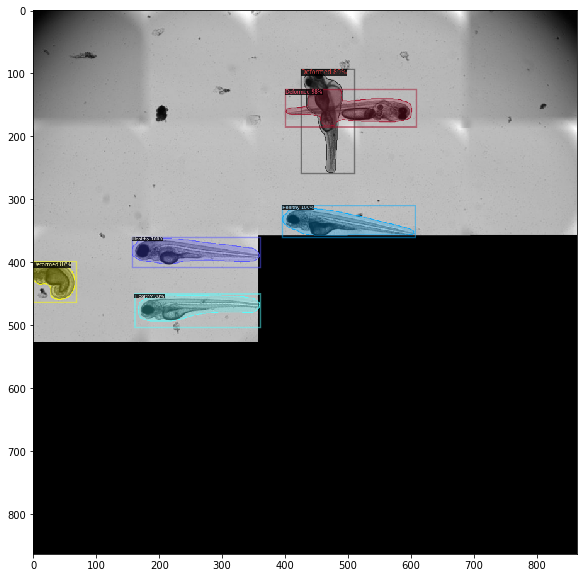

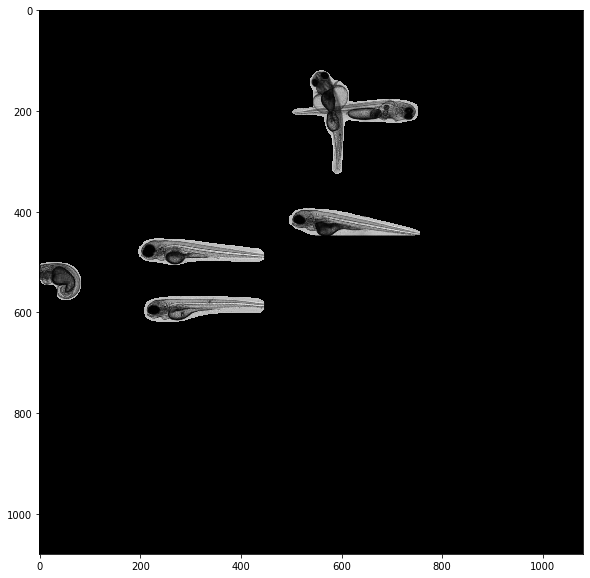

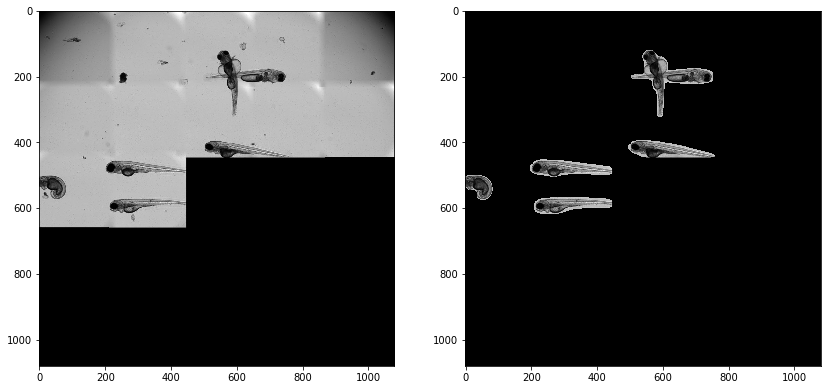

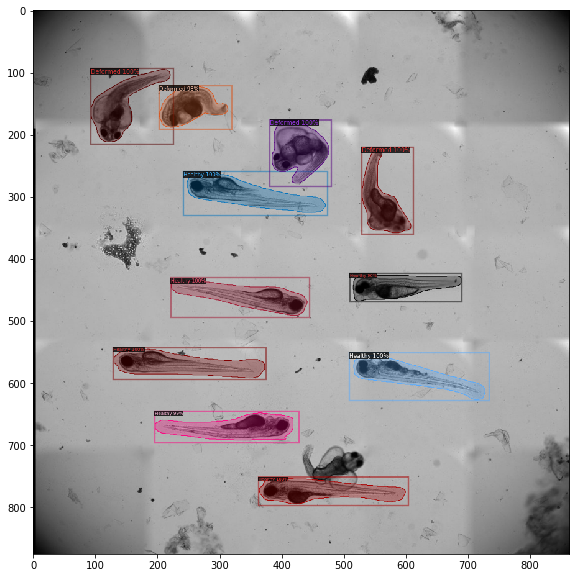

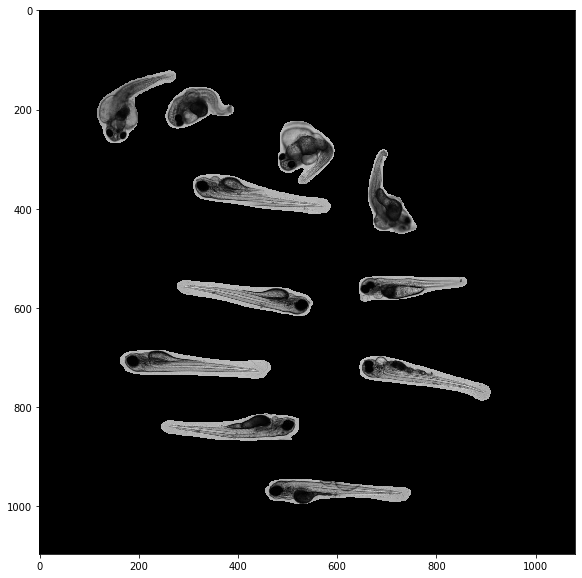

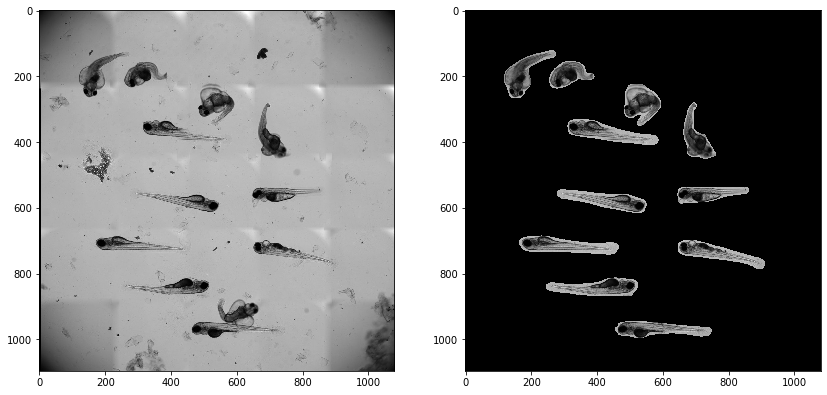

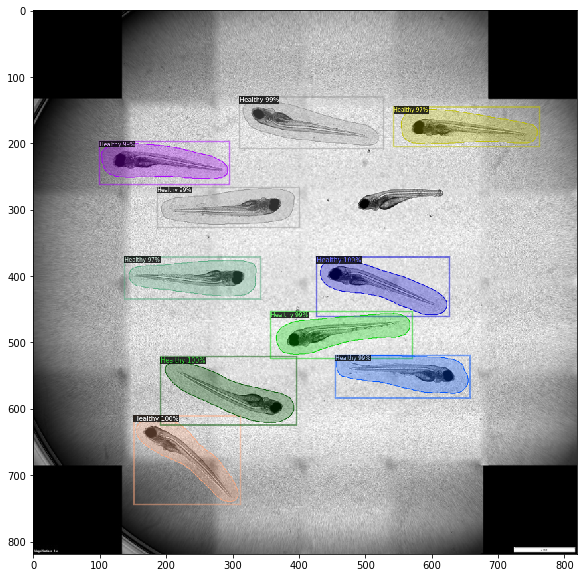

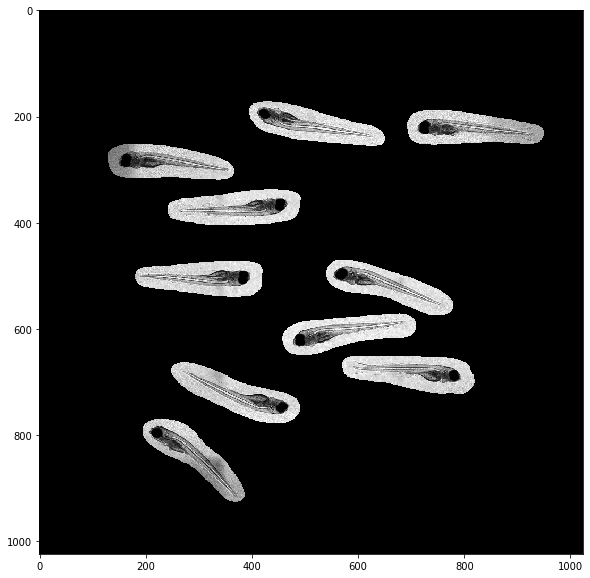

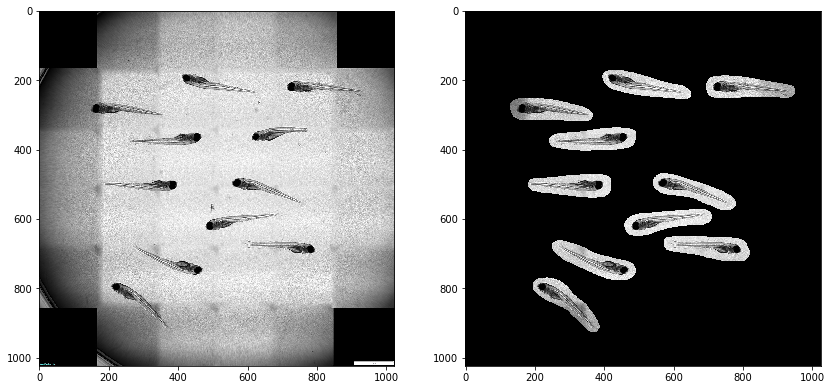

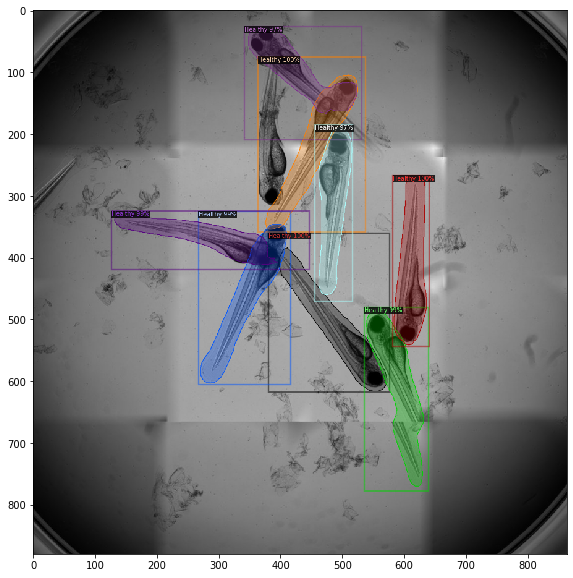

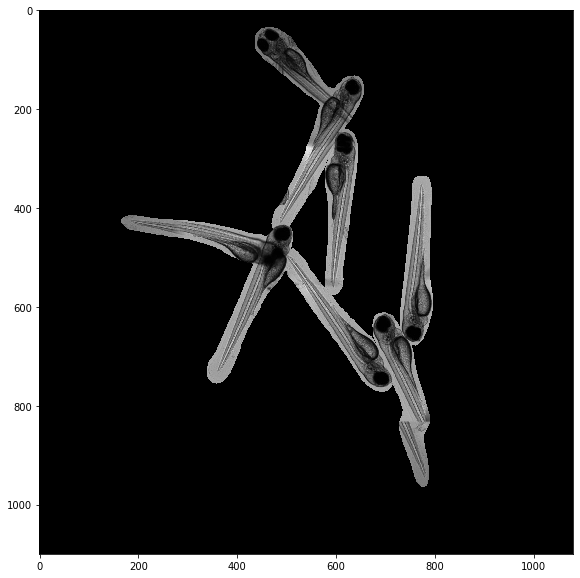

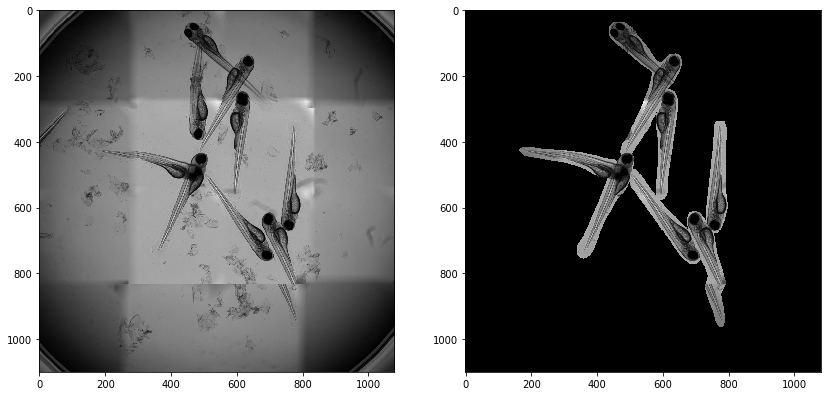

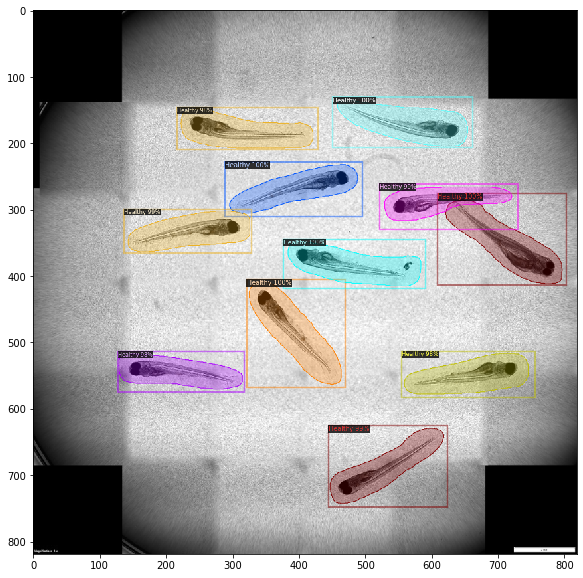

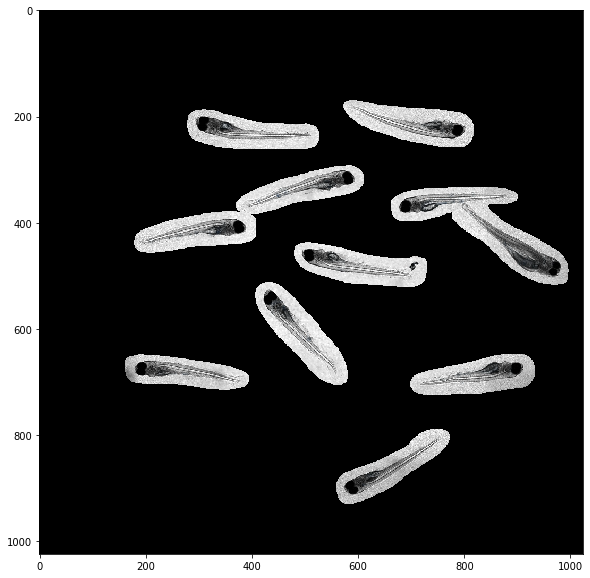

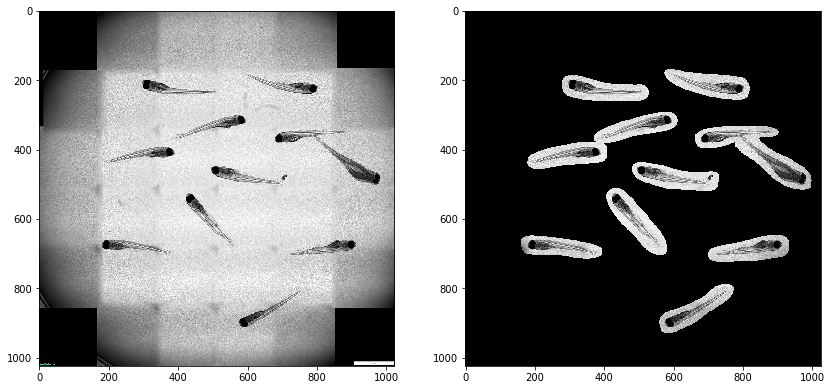

In [11]:
for image, prediction in zip(images, predictions):
    plot_prediction(image, prediction, cfg)
    plot_segementation(image, prediction)
    plot_segementation_vs_real(image, prediction)

## Learning curve

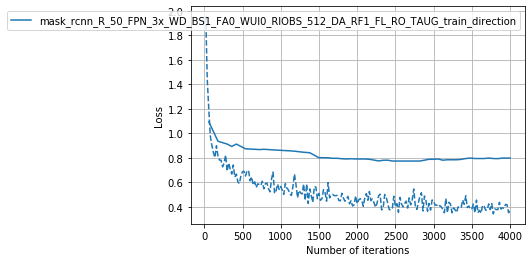

In [12]:
plot_train_vs_validation_loss([cfg.OUTPUT_DIR], show_training_loss=True)

## Compare to other models

In [13]:
bbox_df, segm_df = coco_evaluation_all_model("test")

WARNING [06/11 23:14:27 d2.evaluation.coco_evaluation]: json_file was not found in MetaDataCatalog for 'test_without_direction'. Trying to convert it to COCO format ...
WARNING [06/11 23:14:27 d2.data.datasets.coco]: Using previously cached COCO format annotations at '/home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/mask_rcnn_R_50_FPN_3x_ND_BS1_FA0_WUI0_RIOBS_512_DA_RF1_FL_RO_TAUG/test_without_direction_coco_format.json'. You need to clear the cache file if your dataset has been modified.
[06/11 23:14:28 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/11 23:14:28 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/mask_rcnn_R_50_FPN_3x_ND_BS1_FA0_WUI0_RIOBS_512_DA_RF1_FL_RO_TAUG/coco_instances_results.json
[06/11 23:14:28 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evalu

[06/11 23:14:31 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[06/11 23:14:31 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|
| Deformed   | 44.079 | Healthy    | 43.245 |
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.407
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.704
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.427
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.390
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.380
 Averag

[06/11 23:14:35 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[06/11 23:14:36 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/11 23:14:36 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_06_05_17_28_10/coco_instances_results.json
[06/11 23:14:36 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.943
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.514
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50

In [14]:
bbox_df

model  used_direction  \
0  output/mask_rcnn_R_50_FPN_3x_ND_BS1_FA0_WUI0_R...           False   
1  output/mask_rcnn_R_50_FPN_3x_ND_BS1_FA0_WUI0_R...           False   
2  output/mask_rcnn_R_50_FPN_3x_WD_BS1_FA0_WUI0_R...            True   
3                         output/2020_06_05_19_22_48           False   
4  output/mask_rcnn_R_50_FPN_3x_ND_BS1_FA0_WUI200...           False   
5                         output/2020_06_05_17_28_10           False   

   max_iteration    lrs         AP       AP50       AP75  APs        APm  \
0           4000  0.001  59.044466  95.049505  64.737407  NaN  63.465347   
1           4000  0.001  60.698179  92.079208  71.133997  NaN  64.059406   
2           4000  0.001  43.661992  78.861845  48.849429  NaN  42.326733   
3           4000  0.001  59.154780  92.555673  64.176305  NaN  66.633663   
4           4000  0.001  52.977836  89.914415  54.067232  NaN  51.782178   
5           4000  0.001  53.280408  94.325126  51.448655  NaN  59.108911   

         APl  
0  59.430608  
1  61.278917  
2  48.883601  
3  55.553659  
4  56.828987  
5  52.135640

In [15]:
segm_df

model  used_direction  \
0  output/mask_rcnn_R_50_FPN_3x_ND_BS1_FA0_WUI0_R...           False   
1  output/mask_rcnn_R_50_FPN_3x_ND_BS1_FA0_WUI0_R...           False   
2  output/mask_rcnn_R_50_FPN_3x_WD_BS1_FA0_WUI0_R...            True   
3                         output/2020_06_05_19_22_48           False   
4  output/mask_rcnn_R_50_FPN_3x_ND_BS1_FA0_WUI200...           False   
5                         output/2020_06_05_17_28_10           False   

   max_iteration    lrs         AP       AP50       AP75  APs        APm  \
0           4000  0.001  44.298715  84.045225  42.047783  NaN  52.363454   
1           4000  0.001  46.007261  85.039299  49.751937  NaN  50.358664   
2           4000  0.001  40.733509  70.366284  42.733389  NaN  38.950495   
3           4000  0.001  44.149240  89.068513  43.332034  NaN  46.016894   
4           4000  0.001  42.409214  87.987002  36.019427  NaN  46.552473   
5           4000  0.001  39.145653  90.007810  36.770747  NaN  46.052500   

         APl  
0  41.914090  
1  44.662025  
2  37.982456  
3  43.752148  
4  43.934859  
5  37.810028

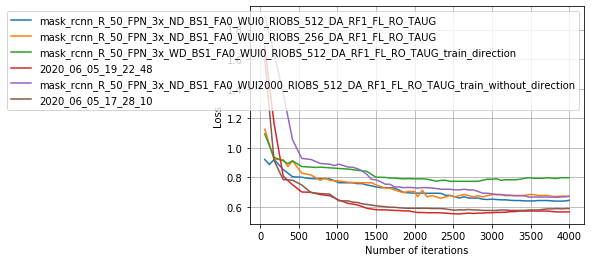

In [16]:
plot_all_model_validation_loss()